In [1]:
import numpy as np
import random
import math
import os

In [2]:
from PIL import Image
import matplotlib.pyplot as plt
import cv2
import time
from matplotlib.pyplot import imshow

In [3]:
def getImageMatrix(imageName):
    im = Image.open(imageName) 
    pix = im.load()
    color = 1
    if type(pix[0,0]) == int:
        color = 0
    image_size = im.size 
    image_matrix = []
    for width in range(int(image_size[0])):
        row = []
        for height in range(int(image_size[1])):
                row.append((pix[width,height]))
        image_matrix.append(row)
    return image_matrix, image_size[0], image_size[1],color

Using the above function to load an image

In [4]:
img_matrix, w, h, c = getImageMatrix("test1.jpg")

In [5]:
w, h, c

(8192, 5461, 1)

In [6]:
len(img_matrix), len(img_matrix[0])

(8192, 5461)

Using Open CV to load the image

In [7]:
img = cv2.cvtColor(cv2.imread("Test1.jpg"), cv2.COLOR_BGR2RGB)

In [8]:
def dec(bitSequence):
    decimal = 0
    for bit in bitSequence:
        decimal = decimal * 2 + int(bit)
    return decimal

In [9]:
def genHenonMap(dimension, key):
    x = key[0]
    y = key[1]
    sequenceSize = dimension * dimension * 8 #Total Number of bitSequence produced
    bitSequence = []    #Each bitSequence contains 8 bits
    byteArray = []      #Each byteArray contains m( i.e 512 in this case) bitSequence
    TImageMatrix = []   #Each TImageMatrix contains m*n byteArray( i.e 512 byteArray in this case)
    for i in range(sequenceSize):
        xN = y + 1 - 1.4 * x**2
        yN = 0.3 * x

        x = xN
        y = yN

        if xN <= 0.4:
            bit = 0
        else:
            bit = 1

        try:
            bitSequence.append(bit)
        except:
            bitSequence = [bit]

        if i % 8 == 7:
            decimal = dec(bitSequence)
            try:
                byteArray.append(decimal)
            except:
                byteArray = [decimal]
            bitSequence = []

        byteArraySize = dimension*8
        if i % byteArraySize == byteArraySize-1:
            try:
                TImageMatrix.append(byteArray)
            except:
                TImageMatrix = [byteArray]
            byteArray = []
    return TImageMatrix

In [10]:
def HenonMapTransform(img, num, a, b):
    rows, cols, ch = img.shape
    img_henon = img.copy()
    for n in range(num):
        for x in range(rows):
            for y in range(cols):
                xn = y + 1 - a * img_henon[x][y][0]**2
                yn = b * img_henon[x][y][0]
                img_henon[x][y] = img_henon[xn%rows][yn%cols]
    return img_henon


In [11]:
def HenonEncryption(imageName,key):
    imageMatrix, dimensionX, dimensionY, color = getImageMatrix(imageName)
    dimension = int((dimensionX + dimensionY)/2)
    transformationMatrix = genHenonMap(dimension, key)
    resultantMatrix = []
    for i in range(dimensionX):
        row = []
        for j in range(dimensionY):
            try:
                if color:
                    row.append(tuple([transformationMatrix[i][j] ^ x for x in imageMatrix[i][j]]))
                else:
                    row.append(transformationMatrix[i][j] ^ imageMatrix[i][j])
            except:
                if color:
                    row = [tuple([transformationMatrix[i][j] ^ x for x in imageMatrix[i][j]])]
                else :
                    row = [transformationMatrix[i][j] ^ x for x in imageMatrix[i][j]]
        try:    
            resultantMatrix.append(row)
        except:
            resultantMatrix = [row]
    if color:
      im = Image.new("RGB", (dimensionX, dimensionY))
    else: 
      im = Image.new("L", (dimensionX, dimensionY)) # L is for Black and white pixels

    pix = im.load()
    for x in range(dimensionX):
        for y in range(dimensionY):
            pix[x, y] = resultantMatrix[x][y]
    im.save(imageName.split('.')[0] + "_HenonEnc.png", "PNG")

In [12]:
def HenonDecryption(imageNameEnc, key):
    imageMatrix, dimensionX, dimensionY, color = getImageMatrix(imageNameEnc)
    dimension = int((dimensionX + dimensionY)/2)
    transformationMatrix = genHenonMap(dimension, key)
    pil_im = Image.open(imageNameEnc, 'r')
    imshow(np.asarray(pil_im))
    henonDecryptedImage = []
    for i in range(dimensionX):
        row = []
        for j in range(dimensionY):
            try:
                if color:
                    row.append(tuple([transformationMatrix[i][j] ^ x for x in imageMatrix[i][j]]))
                else:
                    row.append(transformationMatrix[i][j] ^ imageMatrix[i][j])
            except:
                if color:
                    row = [tuple([transformationMatrix[i][j] ^ x for x in imageMatrix[i][j]])]
                else :
                    row = [transformationMatrix[i][j] ^ x for x in imageMatrix[i][j]]
        try:
            henonDecryptedImage.append(row)
        except:
            henonDecryptedImage = [row]
    if color:
        im = Image.new("RGB", (dimensionX, dimensionY))
    else: 
        im = Image.new("L", (dimensionX, dimensionY)) # L is for Black and white pixels

    pix = im.load()
    for x in range(dimensionX):
        for y in range(dimensionY):
            pix[x, y] = henonDecryptedImage[x][y]
    im.save(imageNameEnc.split('_')[0] + "_HenonDec.png", "PNG")

In [13]:
img2 = cv2.cvtColor(cv2.imread("HorizonZero.png"), cv2.COLOR_BGR2RGB)

In [14]:
img2.shape

(250, 250, 3)

In [22]:
image = "HorizonZero"
ext = ".png"
key = (0.1,0.1)

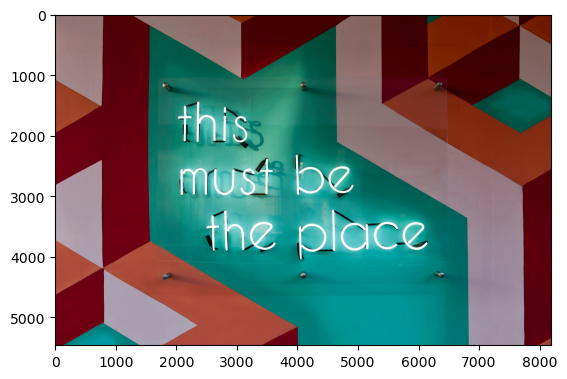

In [23]:
pil_im = Image.open(image + ext, 'r')
plt.imshow(np.asarray(pil_im))

In [24]:
HenonEncryption(image + ext, key)
im = Image.open(image + "_HenonEnc.png", 'r')
plt.imshow(np.asarray(im))

KeyboardInterrupt: 

In [26]:
key = (0.1,0.1)
start = time.time()
ArnoldCatEncryptionIm = HenonEncryption("HorizonZero.png", key)
print("Time taken: ", time.time() - start)

In [20]:
img = cv2.imread("Test1.jpg")
images = [img]
for i in range (0,1):
    img = HenonMapTransform(img, i , 25 , 25)
    images.append(img.astype('int32'))

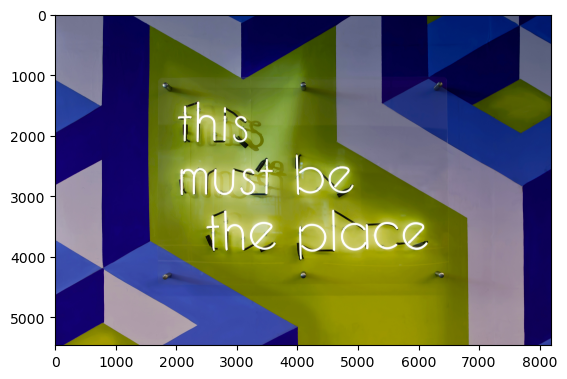

In [21]:
plt.imshow(images[-1])
